In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# INFO
### 1. longitude: A measure of how far west a house is; a higher value is farther west
### 2. latitude: A measure of how far north a house is; a higher value is farther north
### 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
### 4. totalRooms: Total number of rooms within a block
### 5. totalBedrooms: Total number of bedrooms within a block
### 6. population: Total number of people residing within a block
### 7. households: Total number of households, a group of people residing within a home unit, for a block
### 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
### 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
### 10. oceanProximity: Location of the house w.r.t ocean/sea



In [47]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

 **Get to know your data**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [49]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [50]:
# In the given datasets we have 9 continuous variables and one categorical variable. ML algorithms do not work well with categorical data. 
# So, we will convert the categorical data


In [51]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

**Working with categorical data**

In [52]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

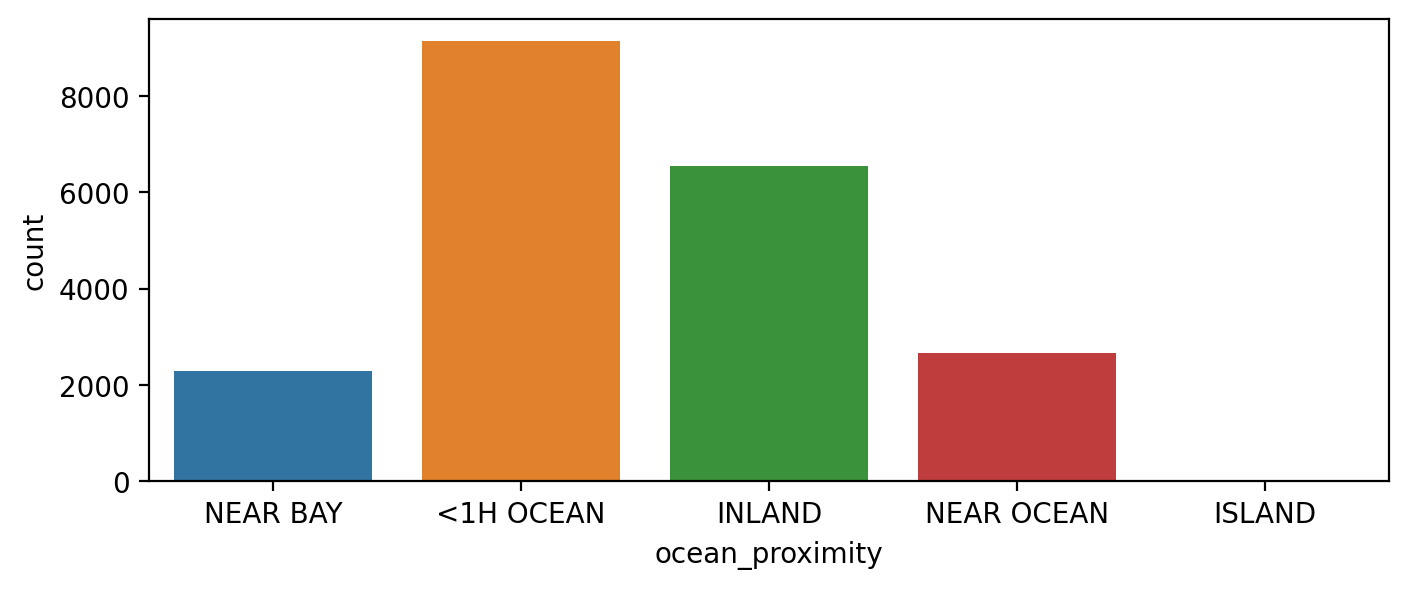

In [53]:
plt.figure(figsize=(8,3),dpi=200)
sns.countplot(data=df,x='ocean_proximity')

In [54]:
new_val = pd.get_dummies(df.ocean_proximity)

In [55]:
new_val.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [56]:
df[new_val.columns] = new_val

In [57]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [59]:
df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       , '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [60]:
df.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,0.442636,0.317393,0.000242,0.110950,0.128779,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,0.496710,0.465473,0.015563,0.314077,0.334963,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,0.000000,0.000000,0.000000,0.000000,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,1.000000,1.000000,0.000000,0.000000,0.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [61]:
# Now, let's understand the correlation between variable by plotting correlation plot

In [62]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,0.321121,-0.055575,0.009446,-0.474489,0.045509,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.446969,0.351166,-0.016572,0.358771,-0.160818,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.045300,-0.236645,0.017020,0.255172,0.021622,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,-0.003031,0.025624,-0.007572,-0.023022,-0.009175,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.018314,-0.006463,-0.004361,-0.019873,0.000679,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,0.074613,-0.020732,-0.010412,-0.060880,-0.024264,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.042435,-0.039402,-0.009077,-0.010093,0.001714,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.168876,-0.237496,-0.009228,0.056197,0.027344,0.688075
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,1.000000,-0.607669,-0.013872,-0.314813,-0.342620,0.256617
INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006463,-0.020732,-0.039402,-0.237496,-0.607669,1.000000,-0.010614,-0.240887,-0.262163,-0.484859


<Axes: >

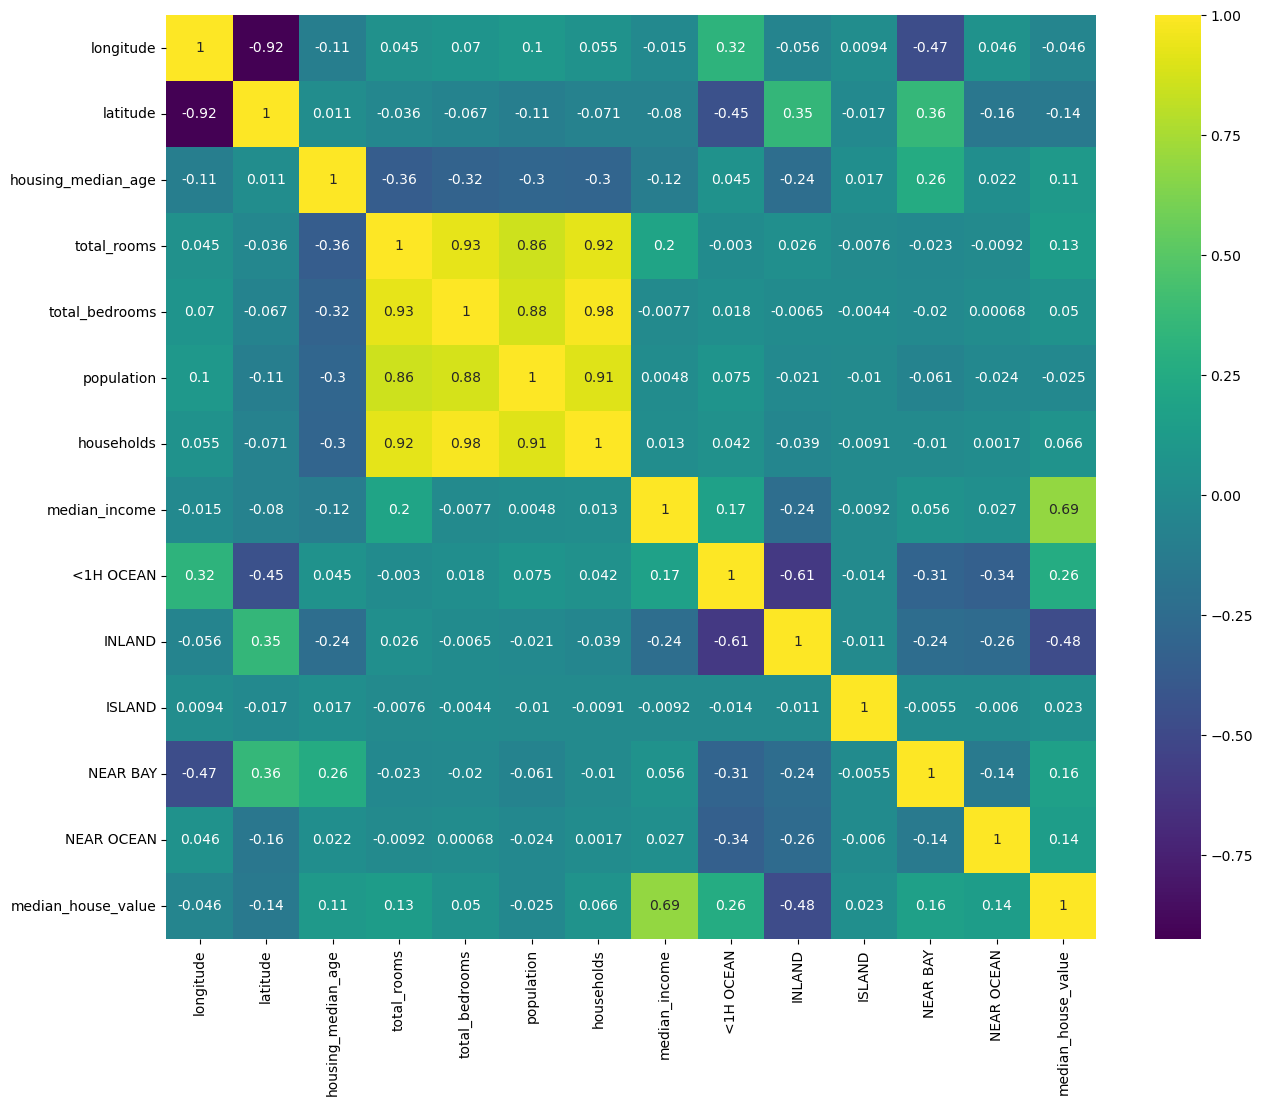

In [63]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True,cmap='viridis')

In [67]:
df.corr().sort_values(ascending=False, by = 'median_house_value')['median_house_value']

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

Text(0, 0.5, 'count')

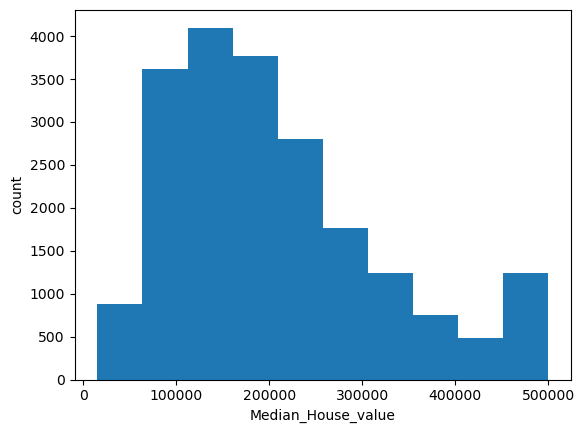

In [78]:
plt.hist(df['median_house_value'])
plt.xlabel('Median_House_value')
plt.ylabel('count')

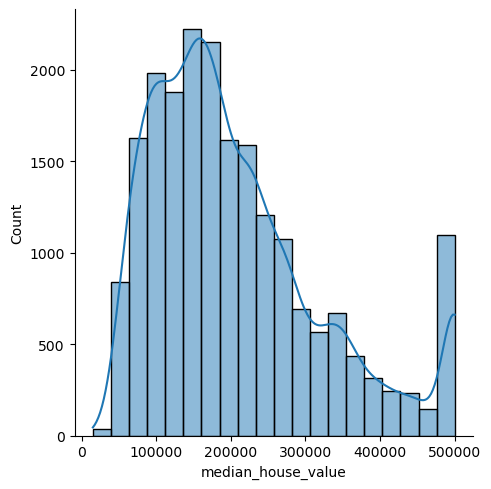

In [73]:
sns.displot(df['median_house_value'],kde=True,bins=20)


In [ ]:
# We can see that the median house value is mostly falls between 10,0000 to 30,0000 with few exceptions. 

## Data Cleaning

In [80]:
df.isnull().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
median_house_value    0
dtype: int64

In [82]:
# So, we have 207 null values. We can drop the rows with null values or we can replace the null values.
# 207 is too big a number to drop rows
df = df.fillna(df.mean())

In [83]:
df.isna().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
median_house_value    0
dtype: int64

In [86]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler() 

In [85]:
df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

In [96]:
X = df.drop(['median_house_value'], axis=1)
y= df['median_house_value']

In [150]:
X_T = convert.fit_transform(X.values)
y_T = convert.fit_transform(df['median_house_value'].values.reshape(-1,1)).flatten() 

In [151]:
X_T

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [152]:
y_T

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

**Split the data into train and test**

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_T,y_T, test_size=0.2, random_state=15)                                   

## ML Model - Linear Regression

In [154]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_regression = linear_model.LinearRegression()
linear_regression.fit(feature_train,label_train)


LinearRegression()

In [155]:
r2score_LR_train=r2_score(linear_regression.predict(X_train),y_train)

In [156]:
r2score_LR_train

0.45702097922843565

## Cross Validation Score

In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
cross_val_score(linear_regression, X_train,y_train, cv=10) 

array([0.62850359, 0.69202668, 0.67129475, 0.62750678, 0.66750201,
       0.6307628 , 0.6243288 , 0.61399925, 0.64755373, 0.64076521])

In [159]:
r2score_LR_test = r2_score(linear_regression.predict(X_test),y_test) 

In [160]:
r2score_LR_test

0.4405129964101714

In [161]:
linear_regression.coef_

array([-4.59642711e-01, -4.69577288e-01,  1.12380994e-01, -7.76067181e-02,
        2.60362480e-01, -4.40717690e-01,  2.92638624e-01,  6.32436962e-01,
        6.37219427e+10,  5.97145838e+10,  1.99652046e+09,  4.02923225e+10,
        4.29717471e+10])

In [162]:
df.corr()['median_house_value'].sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

## Decision Tree Regressor

In [163]:
from sklearn.tree import DecisionTreeRegressor
tree_regression = DecisionTreeRegressor()
tree_regression.fit(X_train,y_train)

DecisionTreeRegressor()

In [164]:
r2score_DT_train=r2_score(tree_regression.predict(X_train),y_train)
r2score_DT_train

1.0

In [165]:
# 99% seems like overfitting. Let's cross validate it.

cross_val_score(tree_regression, feature_train, label_train, cv=10)


array([0.65308564, 0.65789088, 0.60943887, 0.63060739, 0.65365891,
       0.63944415, 0.66604984, 0.63961973, 0.63517352, 0.67195422])

In [166]:
r2_DT_test= r2_score(tree_regression.predict(feature_test),label_test) 
r2_DT_test

0.921417215170825

## Random Forest Regressor

In [167]:
from sklearn.ensemble import RandomForestRegressor
forest_regression = RandomForestRegressor()

In [168]:
forest_regression.fit(X_train,y_train)

RandomForestRegressor()

In [169]:
r2score_RF_train=r2_score(forest_regression.predict(X_train),y_train)
r2score_RF_train

0.9718569798154806

In [170]:
cross_val_score(forest_regression, X_train, y_train, cv=10)

array([0.83750637, 0.83349159, 0.82939851, 0.80030521, 0.83910821,
       0.81248192, 0.8266529 , 0.79201415, 0.83070578, 0.80203912])

In [171]:
# let's see how well the random forest regressor fits well with the test data
r2score_RF_test = r2_score(forest_regression.predict(X_test),y_test) 

In [172]:
r2score_RF_test

0.762183801965225

In [173]:
data = [r2score_LR_test, r2_DT_test, r2score_RF_test]
index = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Decision Tree Regressor,0.921417
Random Forest Regressor,0.762184
Linear Regression,0.440513
